# This analysis report is based on an online questionnaire about the gamer and their mental health between 2015 and 2017 in Africa

<p>Dataset:
https://data.mendeley.com/datasets/c53rh2h435/4</p>
<p>ISI:
https://www.med.upenn.edu/cbti/assets/user-content/documents/Insomnia%20Severity%20Index%20(ISI).pdf</p>
<p>ESS:
https://www.uofmhealth.org/conditions-treatments/brain-neurological-conditions/epworth-sleepiness-scale</p>
<p>HADS:
https://www.svri.org/sites/default/files/attachments/2016-01-13/HADS.pdf</p>



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
file_path = "Exploratory study of mental health among gamers in Gabon and Tunisia.xlsx"
excel_data = pd.ExcelFile(file_path)
# Print the third sheet (Definitions)
definitions_df = pd.read_excel(file_path, sheet_name="Definitions")
print(definitions_df)

   Participants                                Unnamed: 1
0          Educ                                 education
1           Age                                       Age
2        Mhog/w                 Mean Hours of Gaming/week
3        Mmog/g               Mean months of gaming/gamer
4            Ag                           Addicted gamers
5            Pg                        Problematic gamers
6            Eg                            Engaged gamers
7            Ng                    Non problematic gamers
8         Smart                                Smartphone
9        Tablet                                    Tablet
10       Comput                                  Computer
11       Consol                                   Console
12          Ins                      Insomnia score (ISI)
13          EDS  Excessive Daytime Sleepiness score (ESS)
14          Anx                    Anxiety score (HADS-A)
15          Dep                Depression score (HADS-D) 
16            

In [3]:
# Import the first two sheets into DataFrames
tunisia_df = pd.read_excel(file_path, sheet_name="Tunisia")
gabon_df = pd.read_excel(file_path, sheet_name="Gabon")
# combine two df together
combined_df = pd.concat([tunisia_df, gabon_df], ignore_index=True)

In [4]:
#modified data
def drop_unrelated_data(modified_df):
    modified_df.loc[:, "is_male"] = modified_df["Participants"].apply(lambda x: 1 if x=="h" else 0)
    modified_df = modified_df.drop(["Educ","Participants"], axis = 1)
    return modified_df

In [5]:
# check if any irregular data
def check_irregular(modified_df):
    gamer_columns = ["Ag", "Pg", "Eg", "Ng"]
    non_regular_rows = modified_df[modified_df[gamer_columns].sum(axis=1) != 1]
    print("Check gamer_type DONE")
    device_columns = ["Smart", "Tablet", "Comput", "Consol"]
    invalid_rows = modified_df[modified_df[device_columns].sum(axis=1) != 1]
    print("Check device_type DONE")
    # print and drop the irregular data
    irregular_idx = []
    if not non_regular_rows.empty:
        print("Irregular row of gamer type is:")
        print(non_regular_rows)
        print()
        irregular_idx = list(set(irregular_idx) | set(non_regular_rows.index.tolist()))
    if not invalid_rows.empty:
        print("Irregular row of device type is:")
        print(invalid_rows)
        print()
        irregular_idx = list(set(irregular_idx) | set(invalid_rows.index.tolist()))
    modified_df = modified_df.drop(irregular_idx)
    return modified_df

In [6]:
# converting the gamer_type and device_type
def convert_type(modified_df):
    modified_df.loc[:, "gamer_type"] = modified_df.apply(lambda row: 3 if row["Ag"]==1 else 
                                                         2 if row["Pg"]==1 else 1 if row["Eg"]==1 else 0, axis = 1)
    modified_df.loc[:, "device_type"] = modified_df.apply(lambda row: 4 if row["Consol"]==1 else 
                                                         3 if row["Comput"]==1 else 2 if row["Tablet"]==1 else 1, axis = 1)
    return modified_df

In [7]:
# Converting score to standard, 0 is normal and higher means more suffer.
def convert_score(modified_df):
    modified_df.loc[:, "ISI"] = modified_df.apply(lambda row: 3 if row["Ins"]>=22 else
                                                  2 if row["Ins"]>=15 else 1 if row["Ins"]>=8 else 0, axis = 1)
    modified_df.loc[:, "ESS"] = modified_df.apply(lambda row: 3 if row["EDS"]>=16 else 
                                                  2 if row["EDS"]>=10 else 1 if row["EDS"]>=8 else 0, axis = 1)
    modified_df.loc[:, "HADS-A"] = modified_df.apply(lambda row: 2 if row["Anx"]>=11 else
                                                     1 if row["Anx"]>=8 else 0, axis = 1)
    modified_df.loc[:, "HADS-D"] = modified_df.apply(lambda row: 2 if row["Dep"]==11 else
                                                     1 if row["Dep"]>=8 else 0, axis = 1)
    return modified_df

In [8]:
def drop_original_score(modified_df):
    modified_df = modified_df.drop(modified_df.columns[[3,4,5,6,7,8,9,10,11,12,13,14]], axis = 1)
    return modified_df

In [9]:
combined_df = convert_score(convert_type(check_irregular(drop_unrelated_data(combined_df))))
combined_df

Check gamer_type DONE
Check device_type DONE
Irregular row of gamer type is:
     Age  Mhog/w  Mmog/g  Ag  Pg  Eg  Ng  Smart  Tablet  Comput  Consol  Ins  \
141   21      22      28   0   1   1   0      0       0       1       0    6   

     EDS  Anx  Dep  is_male  
141    5    8    5        1  



,Age,Mhog/w,Mmog/g,Ag,Pg,Eg,Ng,Smart,Tablet,Comput,...,EDS,Anx,Dep,is_male,gamer_type,device_type,ISI,ESS,HADS-A,HADS-D
0,18,20,29,0,0,1,0,1,0,0,...,6,8,8,1,1,1,0,0,1,1
1,22,9,36,0,0,0,1,1,0,0,...,4,4,4,1,0,1,0,0,0,0
2,17,21,25,0,0,1,0,1,0,0,...,7,4,4,1,1,1,0,0,0,0
3,29,23,31,0,1,0,0,1,0,0,...,14,10,4,1,2,1,1,2,1,0
4,23,18,24,0,0,0,1,1,0,0,...,5,4,6,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,18,6,20,1,0,0,0,1,0,0,...,18,19,17,1,3,1,2,3,2,1
746,18,10,15,0,1,0,0,1,0,0,...,11,12,10,1,2,1,1,2,2,1
747,19,4,11,0,0,1,0,1,0,0,...,7,8,6,1,1,1,1,0,1,0
748,18,5,21,1,0,0,0,1,0,0,...,17,18,16,1,3,1,2,3,2,1


In [10]:
# check the score
# 0-28
print(set(combined_df["Ins"]))
# 0-24
print(set(combined_df["EDS"]))
# 0-21
print(set(combined_df["Anx"]))
print(set(combined_df["Dep"]))

{2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22}
{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


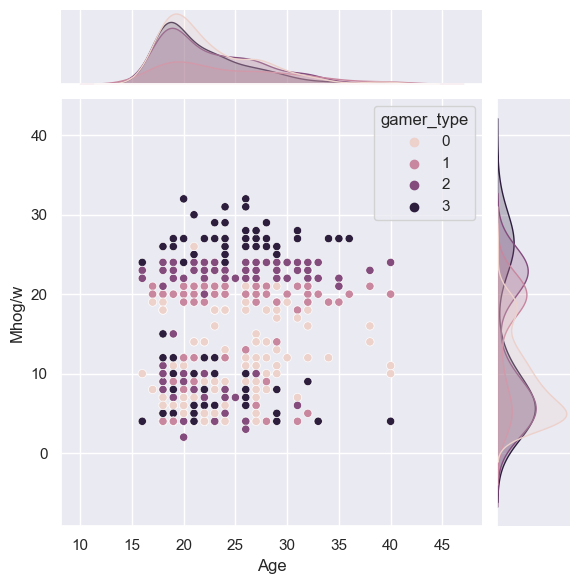

In [11]:
# check the gamer age and their playing time
sns.set_theme()
sns.jointplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    hue="gamer_type",
)
# no difference between each age
plt.savefig('Age_VS_Hour.png')

##  Finding 1: Each type of illness is more depending on the gamer_type instead of playing time

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


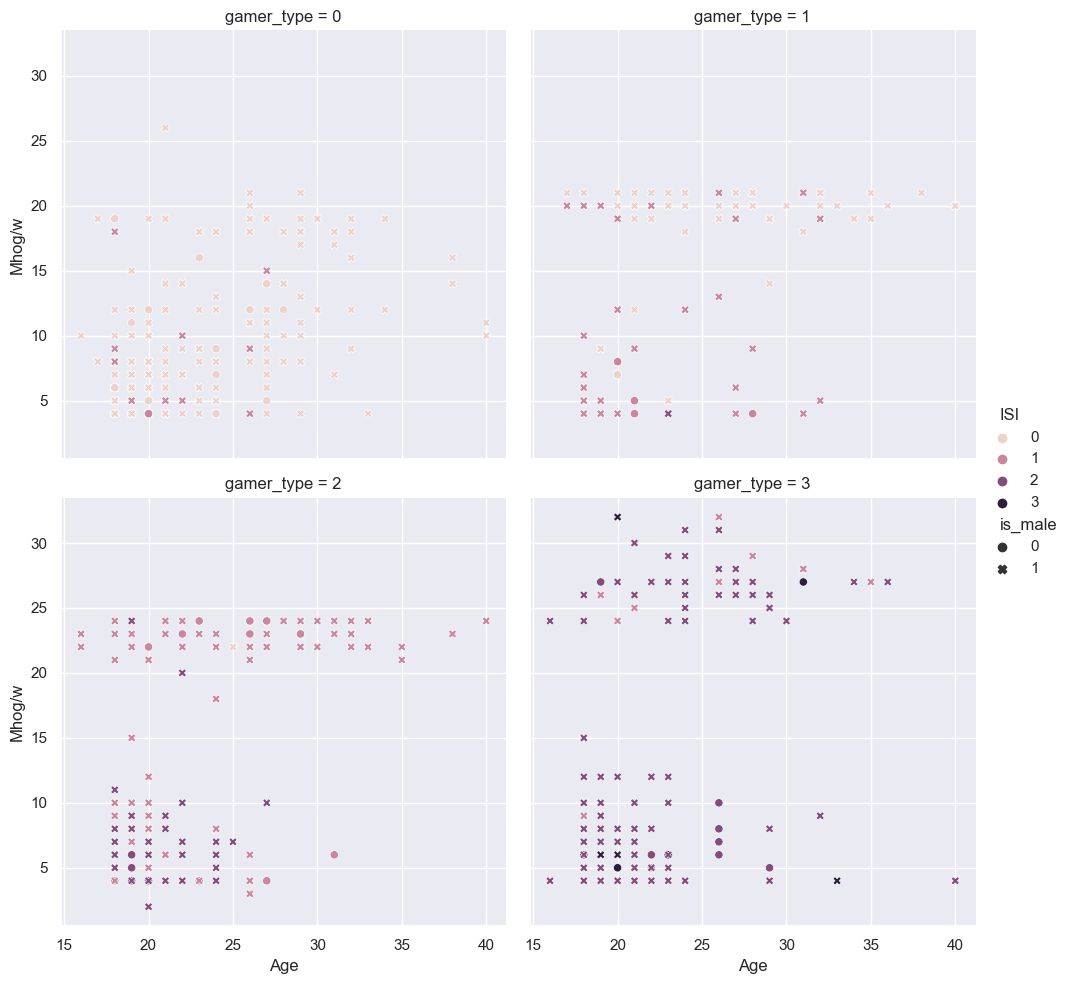

In [12]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ISI",
    style="is_male",
    col_wrap=2
)
plt.savefig('comb_ISI.png')

##  Finding 2: People should control themselves playing games no more than 21 hours/week

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


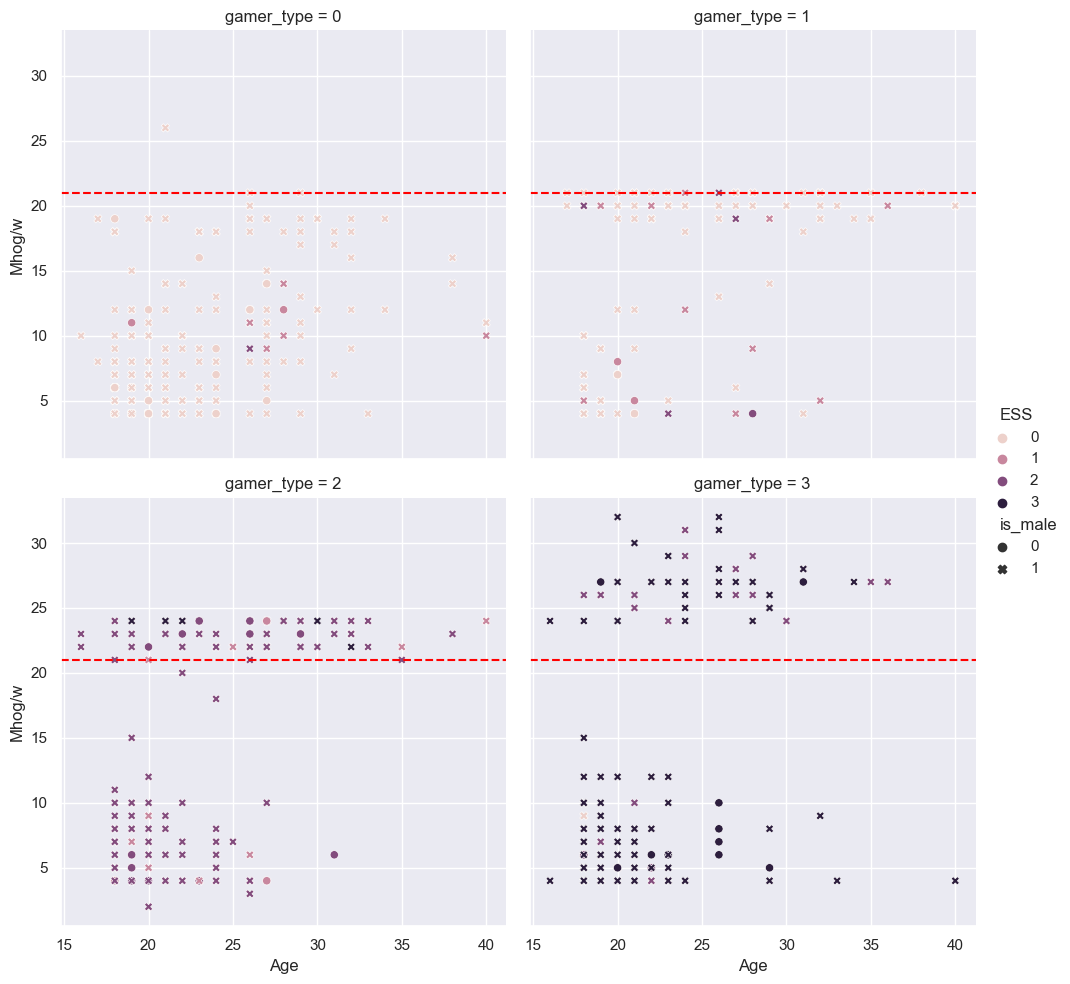

In [13]:
graphic2 = sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ESS",
    style="is_male",
    col_wrap=2
)

# y = 21
for ax in graphic2.axes.flatten():
    ax.axhline(21, ls='--', color='red')

plt.show()
graphic2.savefig('comb_ESS.png')

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


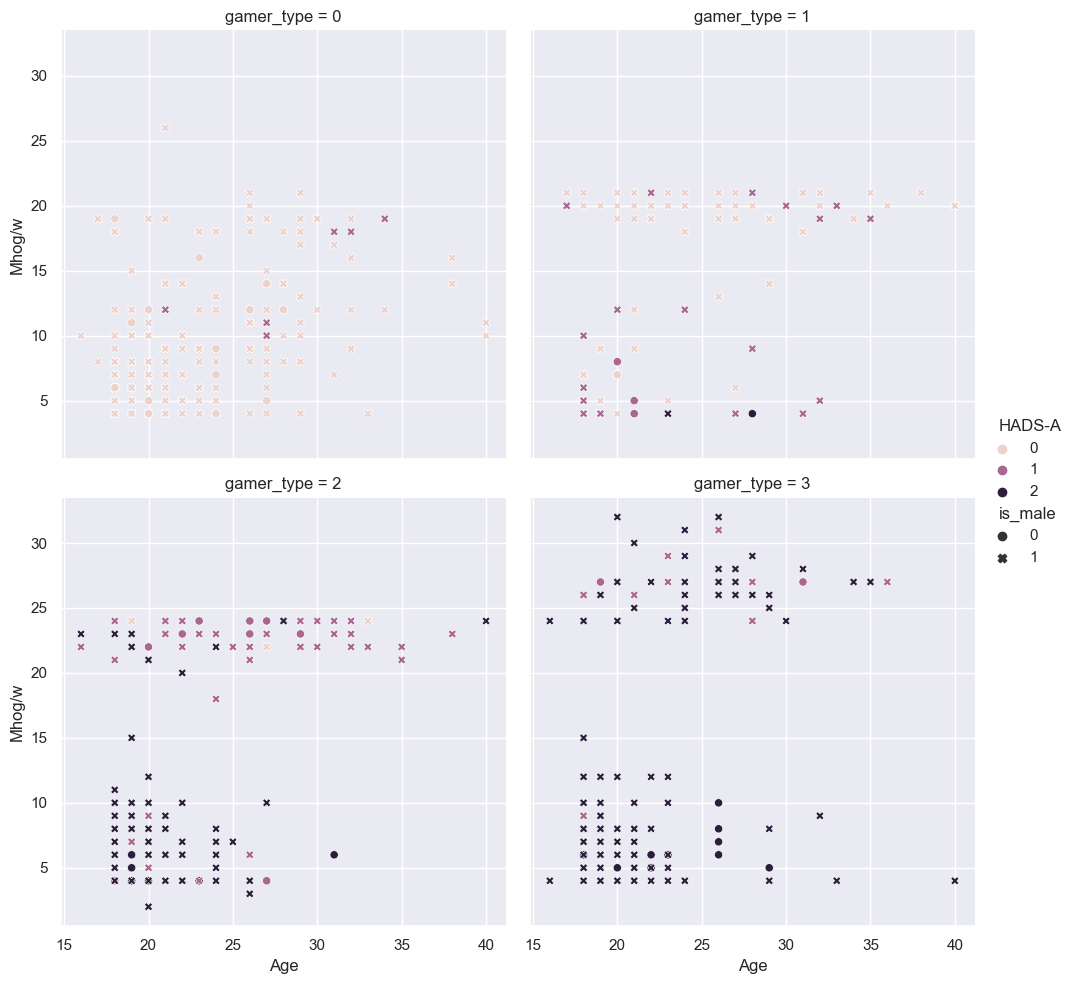

In [14]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-A",
    style="is_male",
    col_wrap=2
)
plt.savefig('comb_HADS-A.png')

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


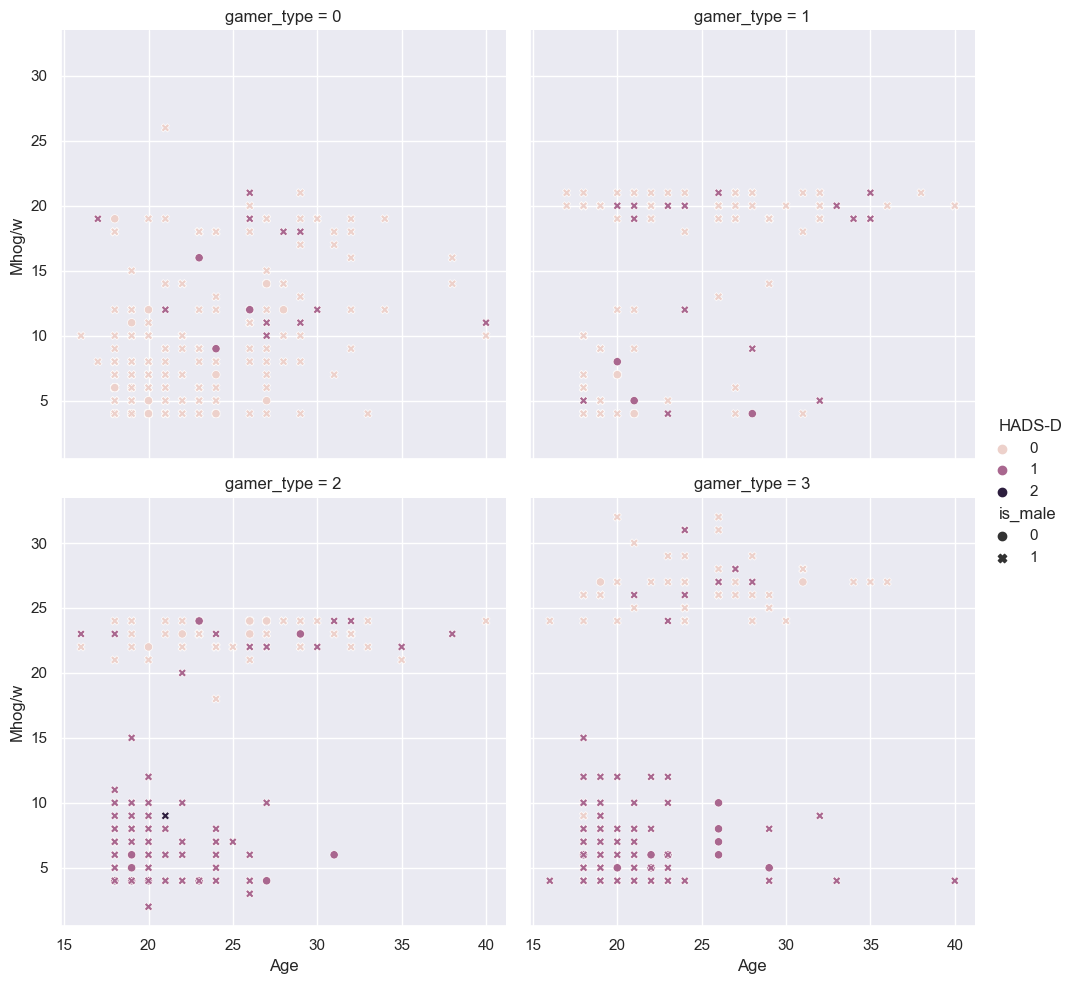

In [15]:
sns.relplot(
    data=combined_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-D",
    style="is_male",
    col_wrap=2
)
plt.savefig('comb_HADS-D.png')

## Finding 3: the younger player are more affected by these mental problem

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


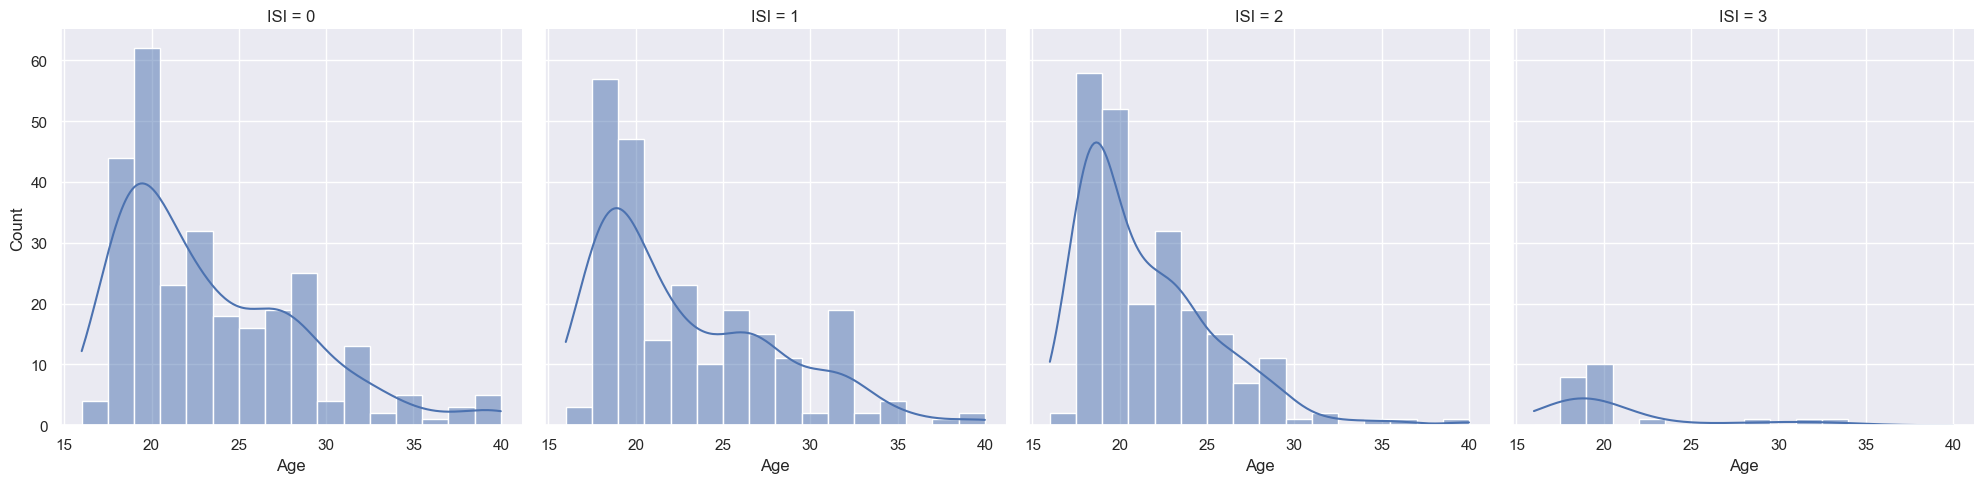

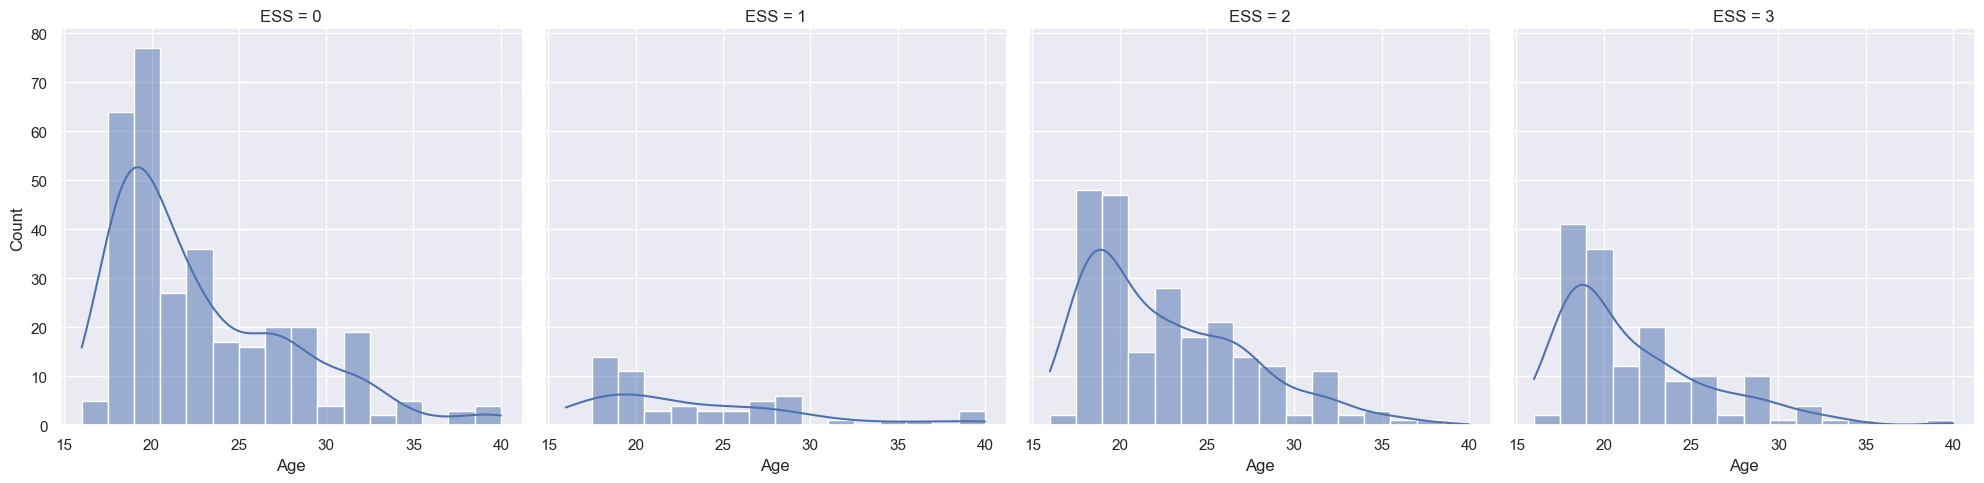

In [16]:
ISI_dis = sns.displot(
    data=combined_df,
    x="Age",
    col="ISI",
    kde=True
  )
ESS_dis = sns.displot(
    data=combined_df,
    x="Age",
    col="ESS",
    kde=True
  )
plt.show()
ISI_dis.savefig('comb_ISI_displot.png')
ESS_dis.savefig('comb_ESS_displot.png')

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


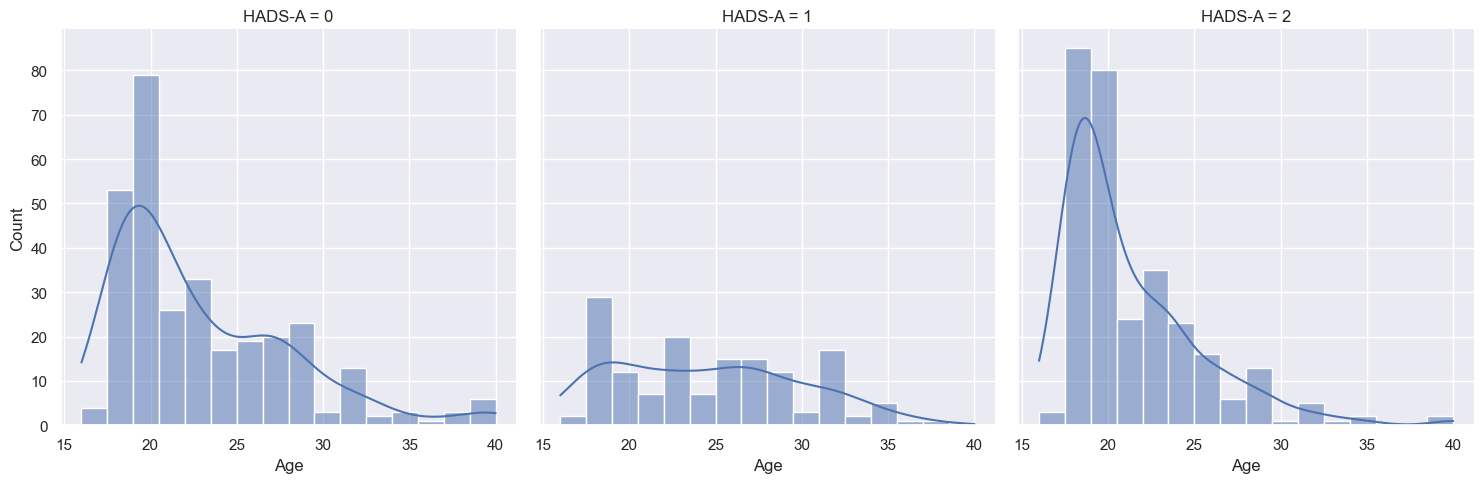

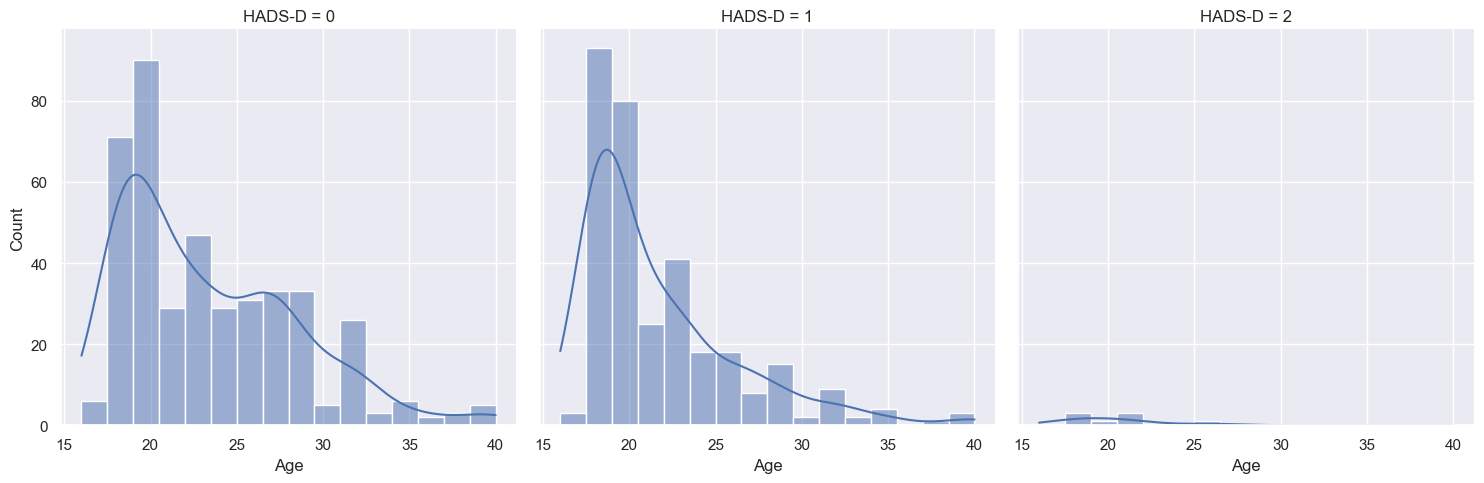

In [17]:
HADS_A_dis = sns.displot(
    data=combined_df,
    x="Age",
    col="HADS-A",
    kde=True
  )
HADS_D_dis = sns.displot(
    data=combined_df,
    x="Age",
    col="HADS-D",
    kde=True
  )
plt.show()
HADS_A_dis.savefig('comb_HADS_A_displot.png')
HADS_D_dis.savefig('comb_HADS_D_displot.png')

# Future works:
### adding the exact data (percentage) and display to adjust the content
### related-data still need: gaming time/sleeping time in Worldwide/US

# V2 Revised:
### adding heatmap to show the linear correlation
### could not find the compatible data
### thinking about the countries might create difference, but still some conclusion should be common.

In [18]:
combined_df_2 = combined_df.copy()
print(combined_df_2.columns)
combined_df_2 = drop_original_score(combined_df_2)
combined_df_2

Index(['Age', 'Mhog/w', 'Mmog/g', 'Ag', 'Pg', 'Eg', 'Ng', 'Smart', 'Tablet',
       'Comput', 'Consol', 'Ins', 'EDS', 'Anx', 'Dep', 'is_male', 'gamer_type',
       'device_type', 'ISI', 'ESS', 'HADS-A', 'HADS-D'],
      dtype='object')


,Age,Mhog/w,Mmog/g,is_male,gamer_type,device_type,ISI,ESS,HADS-A,HADS-D
0,18,20,29,1,1,1,0,0,1,1
1,22,9,36,1,0,1,0,0,0,0
2,17,21,25,1,1,1,0,0,0,0
3,29,23,31,1,2,1,1,2,1,0
4,23,18,24,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
745,18,6,20,1,3,1,2,3,2,1
746,18,10,15,1,2,1,1,2,2,1
747,19,4,11,1,1,1,1,0,1,0
748,18,5,21,1,3,1,2,3,2,1


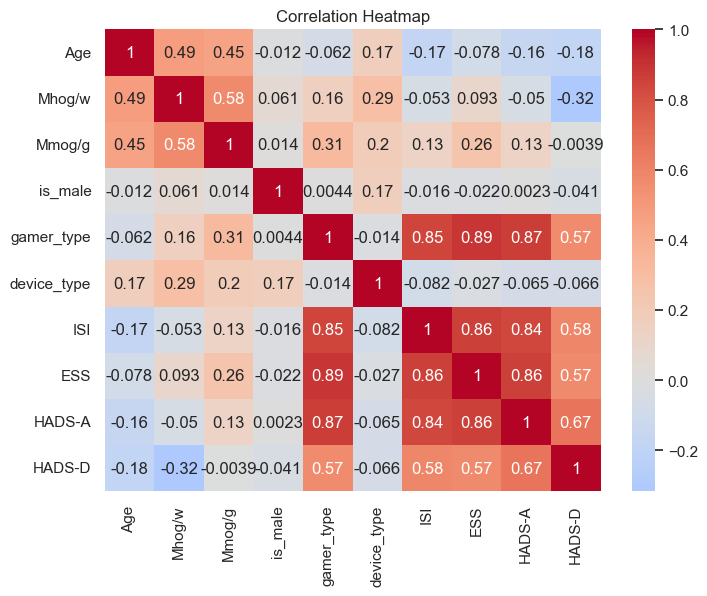

In [19]:
combined_matrix = combined_df_2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(combined_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
tunisia_df = convert_score(convert_type(check_irregular(drop_unrelated_data(tunisia_df))))
tunisia_df_2 = drop_original_score(tunisia_df)

Check gamer_type DONE
Check device_type DONE
Irregular row of gamer type is:
     Age  Mhog/w  Mmog/g  Ag  Pg  Eg  Ng  Smart  Tablet  Comput  Consol  Ins  \
141   21      22      28   0   1   1   0      0       0       1       0    6   

     EDS  Anx  Dep  is_male  
141    5    8    5        1  



In [21]:
gabon_df = convert_score(convert_type(check_irregular(drop_unrelated_data(gabon_df))))
gabon_df_2 = drop_original_score(gabon_df)

Check gamer_type DONE
Check device_type DONE


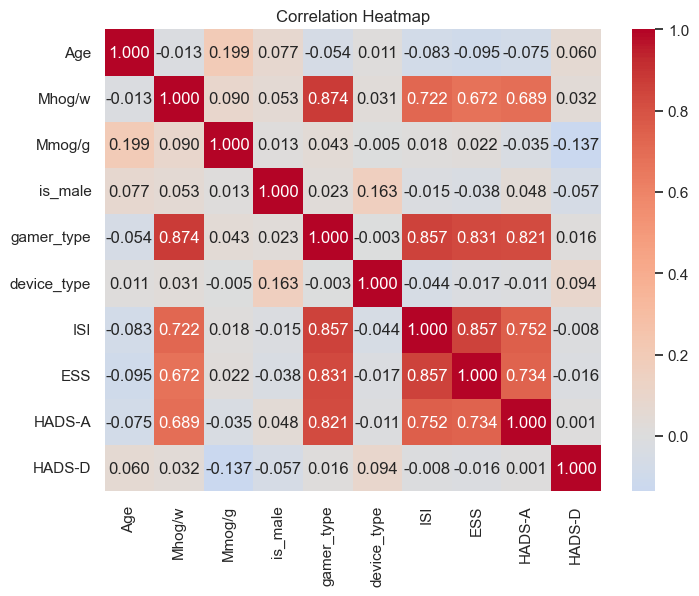

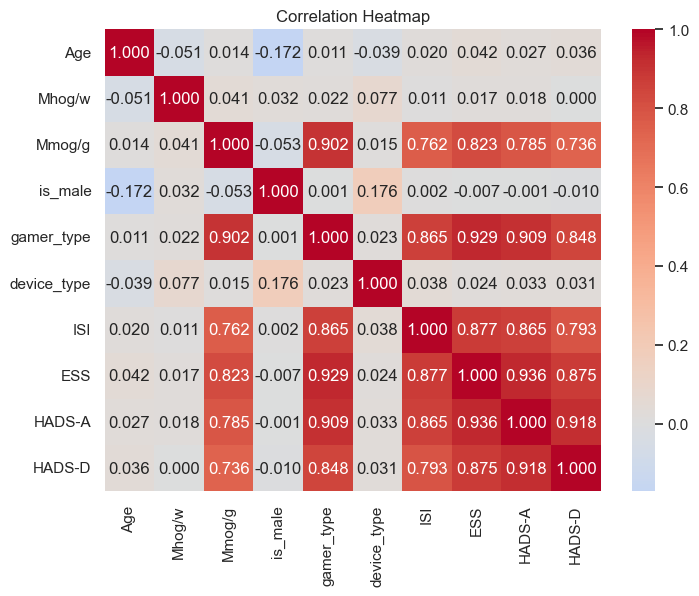

In [22]:
corr_matrix_TUS = tunisia_df_2.corr()
corr_matrix_GAB = gabon_df_2.corr()
corrmatlist = [corr_matrix_TUS, corr_matrix_GAB]
namelist = ["Tunisia", "Gabon"]
for i in range(len(corrmatlist)):
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(corrmatlist[i], annot=True, cmap='coolwarm', center=0,  fmt=".3f")
    plt.title('Correlation Heatmap')
    plt.savefig(f'{namelist[i]}_heat.png')
plt.show()

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


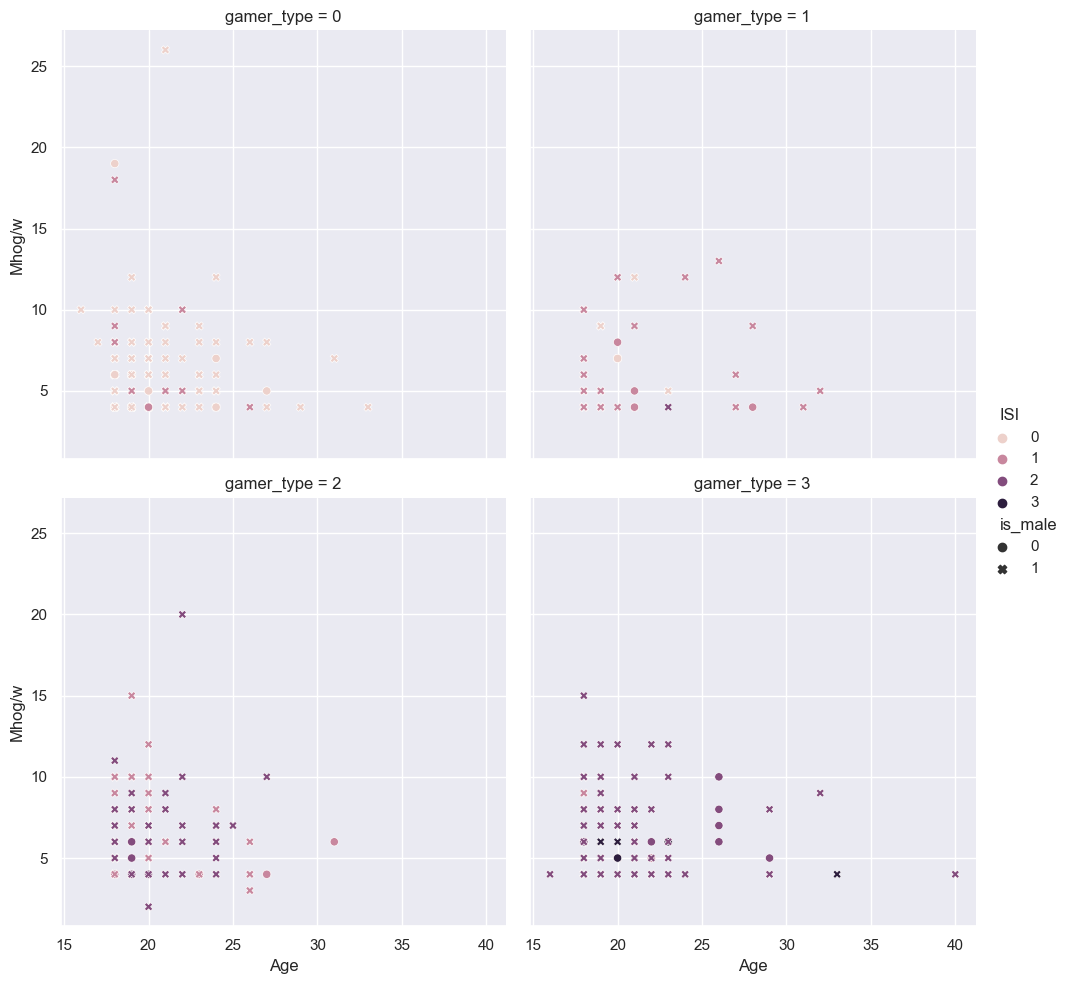

In [23]:
sns.relplot(
    data=gabon_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ISI",
    style="is_male",
    col_wrap=2
)
plt.savefig('gabon_ISI.png')

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


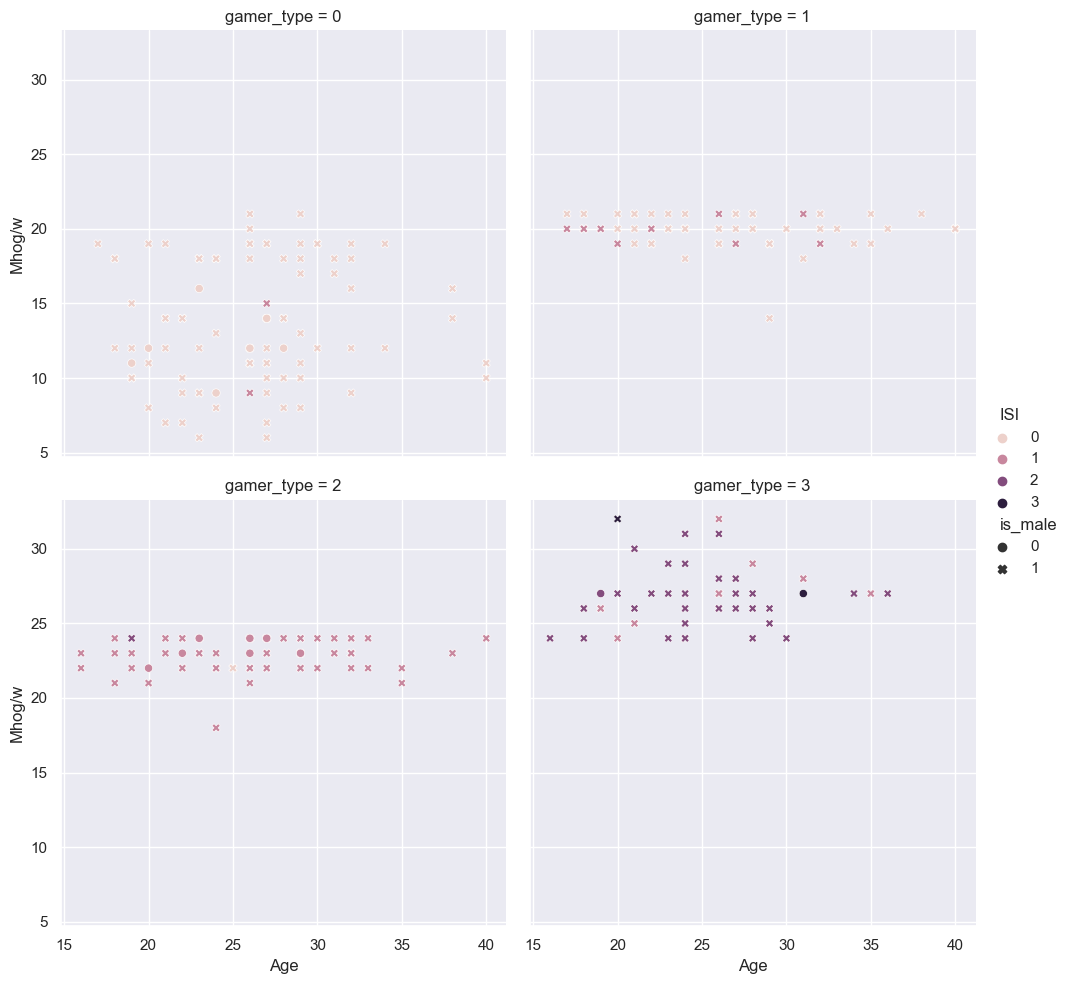

In [24]:
sns.relplot(
    data=tunisia_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="ISI",
    style="is_male",
    col_wrap=2
)
plt.savefig('tunisia_ISI.png')

## 

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


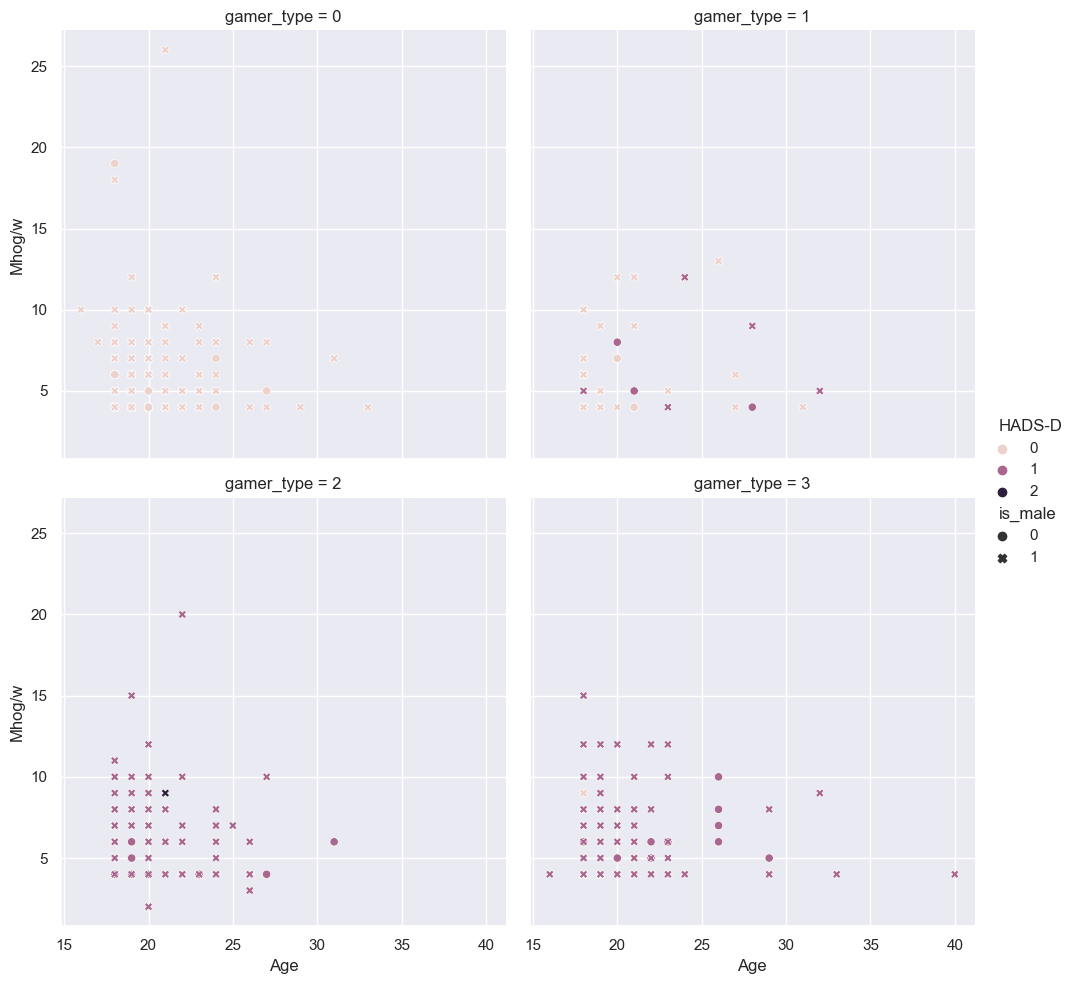

In [25]:
sns.relplot(
    data=gabon_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-D",
    style="is_male",
    col_wrap=2
)
plt.savefig('gabon_HADS-D.png')

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


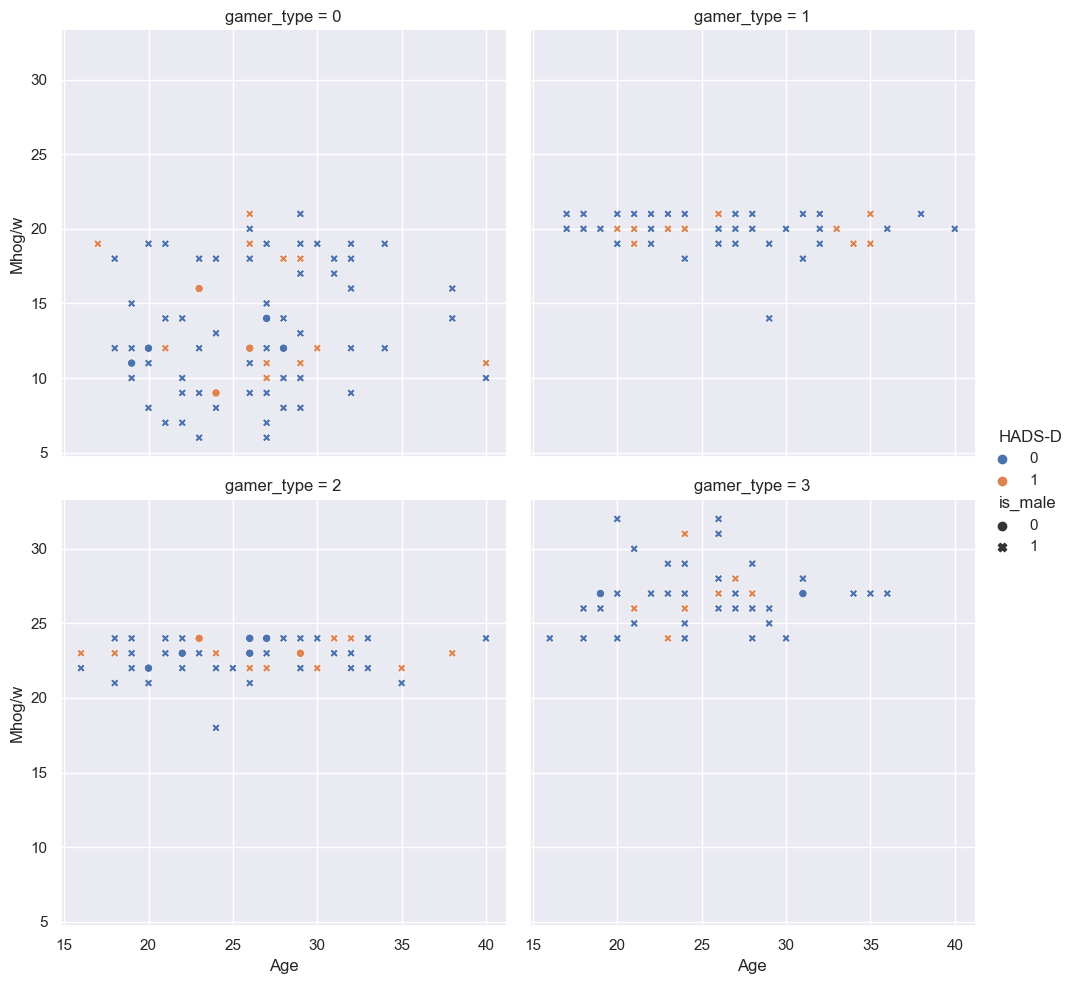

In [26]:
sns.relplot(
    data=tunisia_df,
    x="Age",
    y="Mhog/w",
    col="gamer_type",
    hue="HADS-D",
    style="is_male",
    col_wrap=2
)
plt.savefig('tunisia_HADS-D.png')

## There is a strong linear relationship between gamer_type and playing time in tunisia, but not in gabon

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


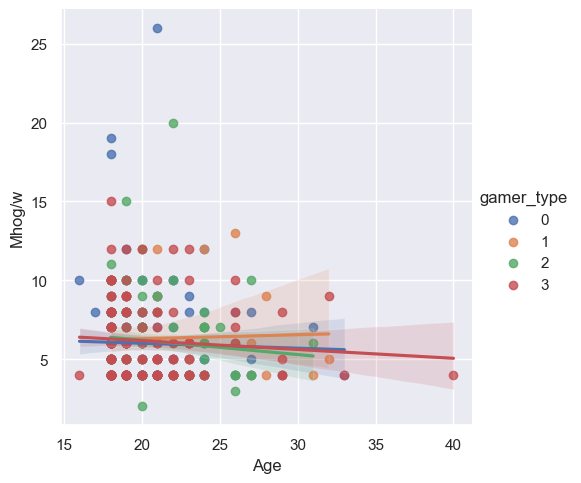

In [27]:
sns.lmplot(
    data=gabon_df,
    x="Age",
    y="Mhog/w",
    hue="gamer_type",
    scatter=True
)
plt.savefig('gabon_linear.png')
plt.show()

E:\Program Files\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


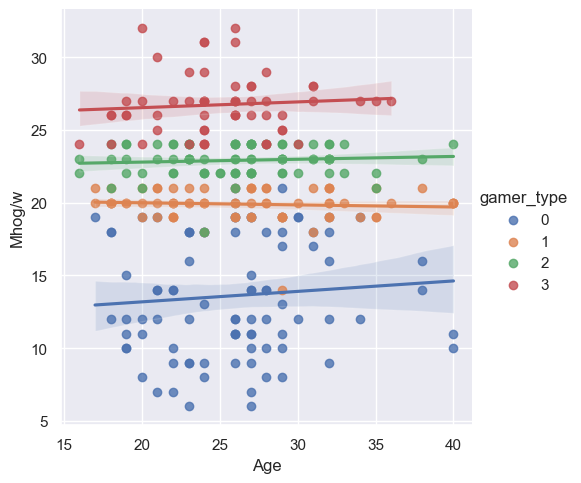

In [28]:
sns.lmplot(
    data=tunisia_df,
    x="Age",
    y="Mhog/w",
    hue="gamer_type",
    scatter=True
)
plt.savefig('tunisia_linear.png')
plt.show()
